In [ ]:
# import sys
# print(sys.version[:3])
# if sys.version[:3] == '3.6':
#     !python3 -m pip install pymoose-3.3.0.dev20220616-cp36-cp36m-manylinux_2_24_x86_64.whl
# elif sys.version[:3] == '3.7':
#     !python3 -m pip install pymoose-3.3.0.dev20220616-cp37-cp37m-manylinux_2_24_x86_64.whl
# elif sys.version[:3] == '3.8':
#     !python3 -m pip install pymoose-3.3.0.dev20220616-cp38-cp38-manylinux_2_24_x86_64.whl

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Rdesigneur: Elec model has 1 compartments and 0 spines on 0 compartments.
Soma dia = 2e-05, length = 0.0002


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

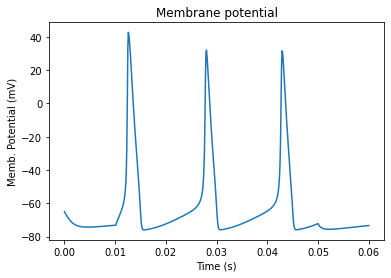

In [1]:
import moose
import rdesigneur as rd
from vpython import *
sphere()
# moose.delete('/model')
rdes = rd.rdesigneur(
    # cellProto syntax: ['somaProto', 'name', dia, length]
    cellProto = [['somaProto', 'soma', 20e-6, 200e-6]],
    chanProto = [['make_HH_Na()', 'Na'], ['make_HH_K()', 'K']],
    chanDistrib = [
        ['Na', 'soma', 'Gbar', '1200' ],
        ['K', 'soma', 'Gbar', '360' ]],
    stimList = [['soma', '1', '.', 'inject', '(t>0.01 && t<0.05) * 1e-9' ]],
    plotList = [['soma', '1', '.', 'Vm', 'Membrane potential']],
    moogList = [['#', '1', '.', 'Vm', 'Vm (mV)']]
)

rdes.buildModel()
soma = moose.element( '/model/elec/soma' )
print( 'Soma dia = {}, length = {}'.format( soma.diameter, soma.length ) )
moose.reinit()

rdes.displayMoogli( 0.0005, 0.06, 0.0 )